In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

- 데이터 비율 조정

In [2]:
# 1. 불균형 데이터 (95:5 비율) 생성
X, y = make_classification(n_samples=1000, n_features=10, 
                           n_classes=2, weights=(0.95,), flip_y=0.0, random_state=0)

print("원본 데이터 클래스 분포:", Counter(y))

# 2. RandomOverSampler 적용 (1:1 맞춤)
oversampler = RandomOverSampler(sampling_strategy=1.0, random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)
print("OverSampling 후 클래스 분포:", Counter(y_over))

# 3. RandomUnderSampler 적용 (1:1 맞춤)
undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)
print("UnderSampling 후 클래스 분포:", Counter(y_under))

원본 데이터 클래스 분포: Counter({0: 950, 1: 50})
OverSampling 후 클래스 분포: Counter({0: 950, 1: 950})
UnderSampling 후 클래스 분포: Counter({0: 50, 1: 50})


- Oversampling → Undersampling 순차 적용

In [3]:
# 오버샘플링: 소수 클래스 → 다수 클래스의 10%까지 증가
oversample = RandomOverSampler(sampling_strategy=0.1, random_state=42)
X_over, y_over = oversample.fit_resample(X, y)
print("오버샘플링 후:", Counter(y_over))

# 언더샘플링: 다수 클래스 → 소수 클래스의 2배까지 감소
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_final, y_final = undersample.fit_resample(X_over, y_over)
print("언더샘플링 후:", Counter(y_final))

오버샘플링 후: Counter({0: 950, 1: 95})
언더샘플링 후: Counter({0: 190, 1: 95})


- 위와 동일한 데이터셋을 사용하여 SMOTE를 적용하세요.

SMOTE 적용 후: Counter({0: 950, 1: 950})


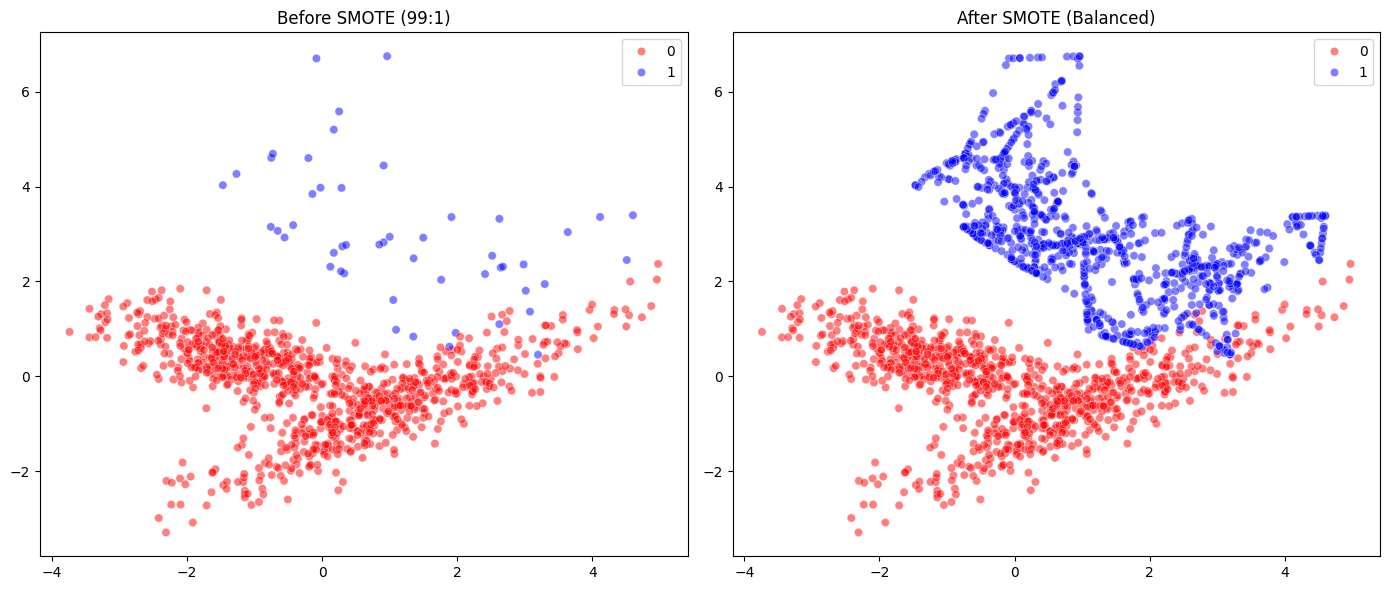

In [4]:
# SMOTE 적용
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # 클래스 1을 클래스 0과 동일 수로 증식
X_resampled, y_resampled = smote.fit_resample(X, y)
print("SMOTE 적용 후:", Counter(y_resampled))

# 스케일링 후 PCA 변환
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_resampled_scaled = scaler.transform(X_resampled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_resampled_pca = pca.transform(X_resampled_scaled)

# 시각화
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Before SMOTE
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=['red', 'blue'], alpha=0.5, ax=axs[0])
axs[0].set_title("Before SMOTE (99:1)")

# After SMOTE
sns.scatterplot(x=X_resampled_pca[:, 0], y=X_resampled_pca[:, 1], hue=y_resampled, palette=['red', 'blue'], alpha=0.5, ax=axs[1])
axs[1].set_title("After SMOTE (Balanced)")

plt.tight_layout()
plt.show()